In [1]:
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'nltk'

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'nltk'

In [3]:
import sys
sys.executable

'C:\\Users\\Biswajit\\20th-century-New\\.venv\\Scripts\\python.exe'

In [4]:
import sys
print("Using python:", sys.executable)

# Install packages into the same environment the notebook is running in
!"{sys.executable}" -m pip install nltk textblob seaborn matplotlib pandas beautifulsoup4 webdriver-manager
# Download NLTK corpora used in the lesson
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
# Download TextBlob corpora
!"{sys.executable}" -m textblob.download_corpora

Using python: C:\Users\Biswajit\20th-century-New\.venv\Scripts\python.exe
  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.7-cp314-cp314-win_amd64.whl.metadata (11 kB)
  Using cached pandas-2.3.3-cp314-cp314-win_amd64.whl.metadata (19 kB)
  Using cached webdriver_manager-4.0.2-py2.py3-none-any.whl.metadata (12 kB)
  Using cached click-8.3.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached regex-2025.11.3-cp314-cp314-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached numpy-2.3.4-cp314-cp314-win_amd64.whl.metadata (60 kB)
  Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp314-cp3

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Biswajit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Biswajit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Biswajit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Biswajit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Biswajit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Biswajit\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Biswajit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Biswajit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Biswajit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [1]:
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob
print("OK — libraries import successfully")

OK — libraries import successfully


In [4]:
with open("20th_century_content.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

In [5]:
with open("20th_century_content.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

print("Loaded characters:", len(raw_text))
print(raw_text[:300])

Loaded characters: 125372




Key events of the 20th century - Wikipedia






















































Close
 If Wikipedia has given you €5 worth of knowledge this year, please give back. 
 If you can, please join the 1% of readers who give. 
Thank you.
Donation account:
Wikimedia e. V.
BIC:
BFSWDE33X


In [6]:
tokens = word_tokenize(raw_text)

In [7]:
tokens = word_tokenize(raw_text)

print("Number of tokens:", len(tokens))
print(tokens[:20])   # preview first 20 tokens

Number of tokens: 23238
['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Close', 'If', 'Wikipedia', 'has', 'given', 'you', '€5', 'worth', 'of', 'knowledge', 'this', 'year']


In [8]:
word_counts = Counter(tokens)
common_words = word_counts.most_common(10)

words = [w for w, c in common_words]
counts = [c for w, c in common_words]

plt.figure(figsize=(10,5))
sns.barplot(x=words, y=counts)
plt.title("Top 10 Most Common Words (Raw)")
plt.show()

NameError: name 'Counter' is not defined

In [9]:
from collections import Counter

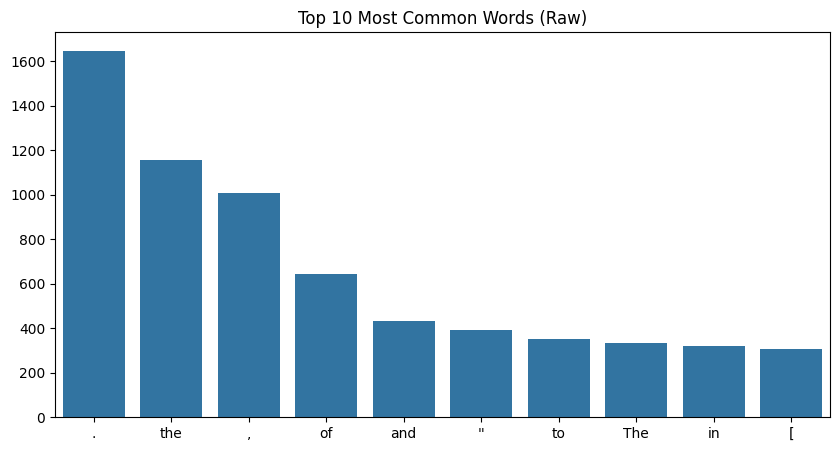

In [10]:
from collections import Counter
word_counts = Counter(tokens)
common_words = word_counts.most_common(10)

words = [w for w, c in common_words]
counts = [c for w, c in common_words]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x=words, y=counts)
plt.title("Top 10 Most Common Words (Raw)")
plt.show()

In [11]:
# Cell A: remove stopwords and punctuation, create clean token list
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Option: keep only alphabetic tokens, lowercased, excluding stopwords
tokens_alpha = [t for t in tokens if t.isalpha()]                  # remove punctuation/numbers
clean_tokens = [t.lower() for t in tokens_alpha if t.lower() not in stop_words]

print("Original token count:", len(tokens))
print("Alphabetic token count:", len(tokens_alpha))
print("Clean token count (no stopwords):", len(clean_tokens))
print("Sample cleaned tokens:", clean_tokens[:30])

NameError: name 'stopwords' is not defined

In [12]:
from nltk.corpus import stopwords
import string

In [13]:
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

tokens_alpha = [t for t in tokens if t.isalpha()]
clean_tokens = [t.lower() for t in tokens_alpha if t.lower() not in stop_words]

print("Original token count:", len(tokens))
print("Alphabetic token count:", len(tokens_alpha))
print("Clean token count (no stopwords):", len(clean_tokens))
print("Sample cleaned tokens:", clean_tokens[:30])

Original token count: 23238
Alphabetic token count: 16031
Clean token count (no stopwords): 10232
Sample cleaned tokens: ['key', 'events', 'century', 'wikipedia', 'close', 'wikipedia', 'given', 'worth', 'knowledge', 'year', 'please', 'give', 'back', 'please', 'join', 'readers', 'give', 'thank', 'donation', 'account', 'wikimedia', 'bic', 'iban', 'donate', 'donation', 'go', 'close', 'donation', 'go', 'wikipedia']


In [14]:
# Cell C: POS tagging using TextBlob
# (TextBlob does POS tagging; it will return list of (word, tag))
blob = TextBlob(" ".join(clean_tokens))   # use cleaned tokens joined into a string
tags_list = blob.tags                     # list of (word, POS-tag) tuples
print("Sample tags:", tags_list[:30])

Sample tags: [('key', 'JJ'), ('events', 'NNS'), ('century', 'NN'), ('wikipedia', 'VBP'), ('close', 'JJ'), ('wikipedia', 'NN'), ('given', 'VBN'), ('worth', 'IN'), ('knowledge', 'NN'), ('year', 'NN'), ('please', 'NN'), ('give', 'VB'), ('back', 'RB'), ('please', 'NN'), ('join', 'NN'), ('readers', 'NNS'), ('give', 'VBP'), ('thank', 'JJ'), ('donation', 'NN'), ('account', 'NN'), ('wikimedia', 'VBD'), ('bic', 'JJ'), ('iban', 'JJ'), ('donate', 'NN'), ('donation', 'NN'), ('go', 'VBP'), ('close', 'JJ'), ('donation', 'NN'), ('go', 'VBP'), ('wikipedia', 'NN')]


Top 10 POS tags: [('NN', 3857), ('JJ', 2325), ('NNS', 1143), ('VBD', 720), ('RB', 458), ('VBP', 420), ('VBG', 289), ('VBN', 252), ('IN', 172), ('VB', 125)]


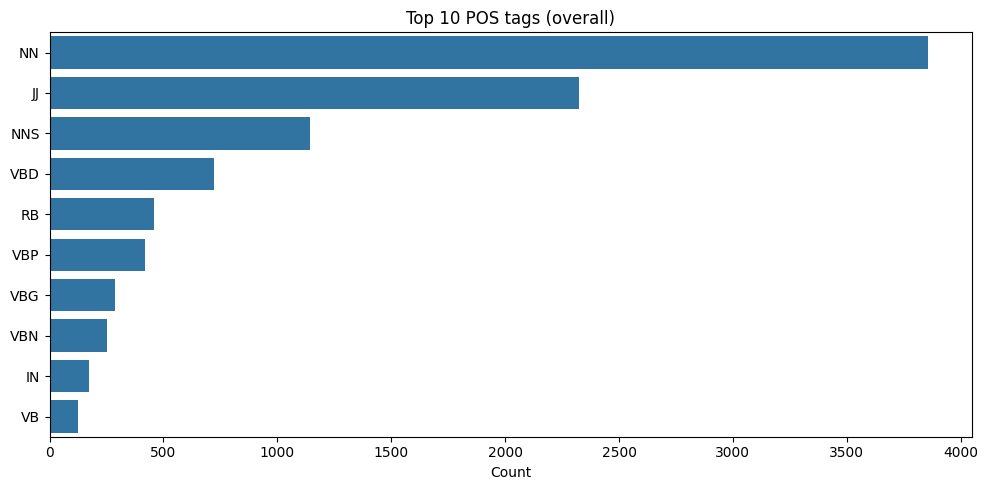

In [15]:
# Cell D: Top 10 POS tags overall and plot
pos_only = [tag for (word, tag) in tags_list]
pos_counts = Counter(pos_only)
top10_pos = pos_counts.most_common(10)
print("Top 10 POS tags:", top10_pos)

labels = [t for t,c in top10_pos]
counts = [c for t,c in top10_pos]

plt.figure(figsize=(10,5))
sns.barplot(x=counts, y=labels)
plt.title("Top 10 POS tags (overall)")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

In [16]:
# Cell E: Filter tags and get top 15 for nouns, verbs, adjectives
df_tags = pd.DataFrame(tags_list, columns=['word','tag'])

# masks
noun_mask = df_tags['tag'].str.startswith('NN')   # includes NN, NNS, NNP, NNPS
verb_mask = df_tags['tag'].str.startswith('VB')   # VB, VBD, VBG, ...
adj_mask  = df_tags['tag'].str.startswith('JJ')   # JJ, JJR, JJS

top_nouns = df_tags[noun_mask]['word'].value_counts().nlargest(15)
top_verbs = df_tags[verb_mask]['word'].value_counts().nlargest(15)
top_adjs  = df_tags[adj_mask]['word'].value_counts().nlargest(15)

# Plot side-by-side
fig, axes = plt.subplots(1,3, figsize=(20,8))
sns.barplot(x=top_nouns.values, y=top_nouns.index, ax=axes[0])
axes[0].set_title("Top 15 Nouns")
sns.barplot(x=top_verbs.values, y=top_verbs.index, ax=axes[1])
axes[1].set_title("Top 15 Verbs")
sns.barplot(x=top_adjs.values, y=top_adjs.index, ax=axes[2])
axes[2].set_title("Top 15 Adjectives")
for ax in axes:
    ax.set_xlabel("Count")
plt.tight_layout()
plt.show()

NameError: name 'pd' is not defined

In [17]:
import pandas as pd

In [18]:
df_tags = pd.DataFrame(tags_list, columns=['word','tag'])

# masks
noun_mask = df_tags['tag'].str.startswith('NN')   # NN, NNS, NNP, NNPS
verb_mask = df_tags['tag'].str.startswith('VB')   # VB, VBD, VBG, VBN, VBP, VBZ
adj_mask  = df_tags['tag'].str.startswith('JJ')   # JJ, JJR, JJS

top_nouns = df_tags[noun_mask]['word'].value_counts().head(15)
top_verbs = df_tags[verb_mask]['word'].value_counts().head(15)
top_adjs  = df_tags[adj_mask]['word'].value_counts().head(15)

top_nouns
top_verbs
top_adjs

word
december    126
soviet       57
new          54
nuclear      38
japanese     32
german       31
united       29
first        29
main         26
many         26
american     22
second       21
british      19
great        18
free         18
Name: count, dtype: int64

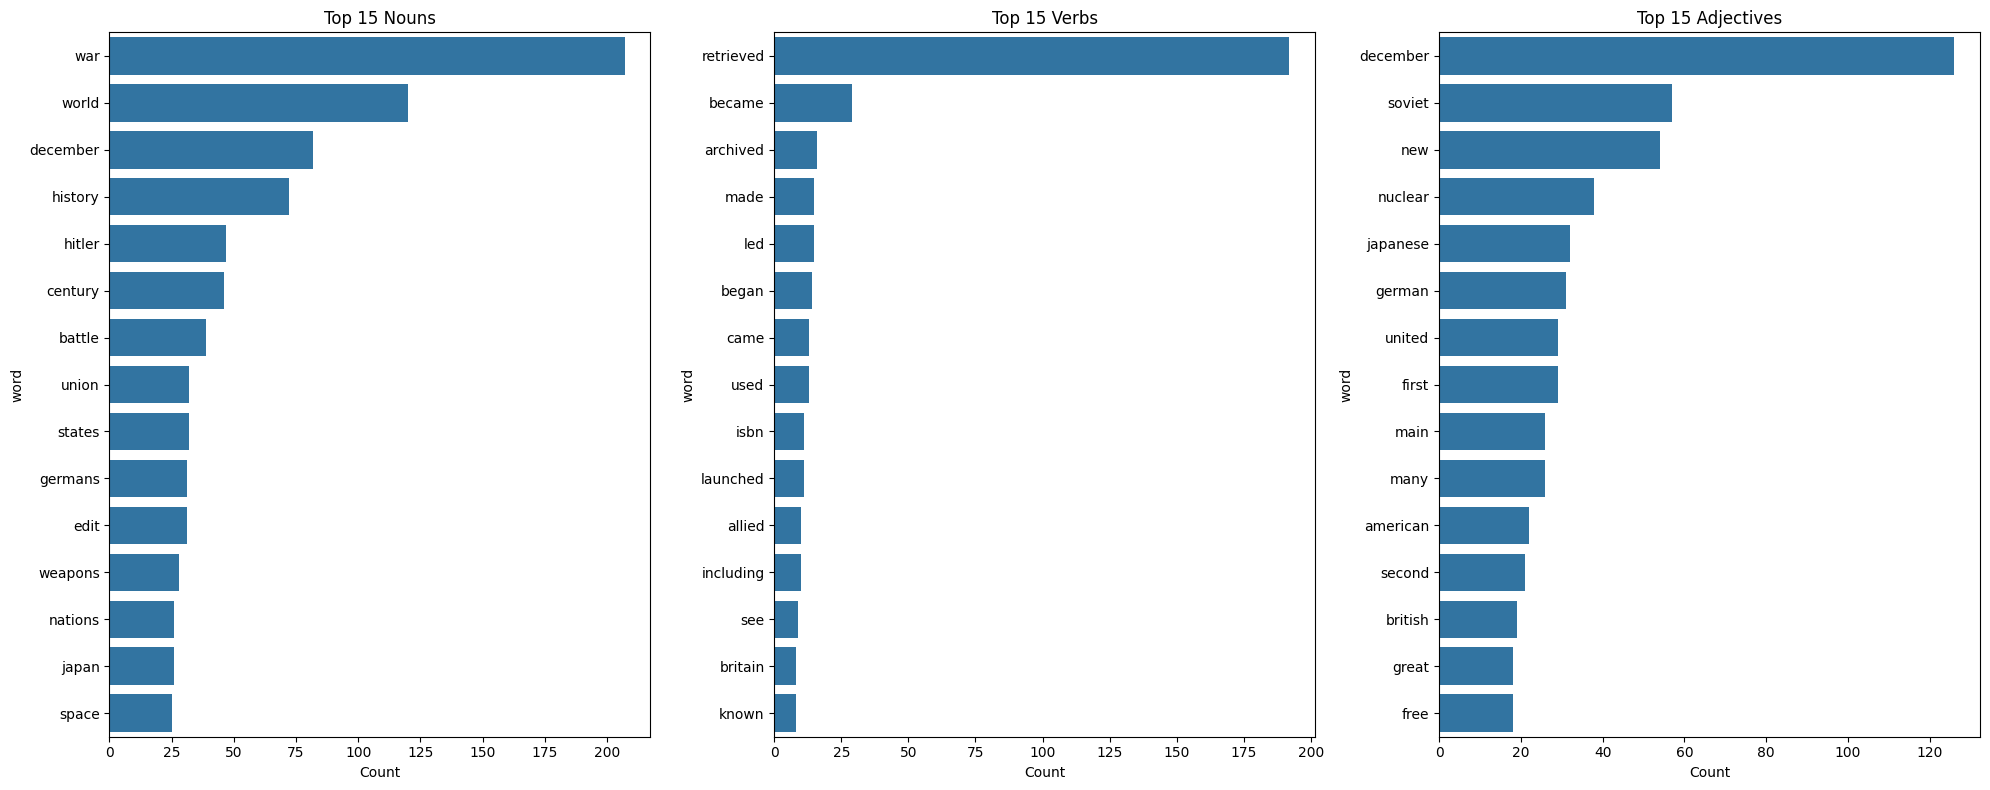

In [19]:
# Cell E: Filter tags and get top 15 for nouns, verbs, adjectives
df_tags = pd.DataFrame(tags_list, columns=['word','tag'])

# masks
noun_mask = df_tags['tag'].str.startswith('NN')   # includes NN, NNS, NNP, NNPS
verb_mask = df_tags['tag'].str.startswith('VB')   # VB, VBD, VBG, ...
adj_mask  = df_tags['tag'].str.startswith('JJ')   # JJ, JJR, JJS

top_nouns = df_tags[noun_mask]['word'].value_counts().nlargest(15)
top_verbs = df_tags[verb_mask]['word'].value_counts().nlargest(15)
top_adjs  = df_tags[adj_mask]['word'].value_counts().nlargest(15)

# Plot side-by-side
fig, axes = plt.subplots(1,3, figsize=(20,8))
sns.barplot(x=top_nouns.values, y=top_nouns.index, ax=axes[0])
axes[0].set_title("Top 15 Nouns")
sns.barplot(x=top_verbs.values, y=top_verbs.index, ax=axes[1])
axes[1].set_title("Top 15 Verbs")
sns.barplot(x=top_adjs.values, y=top_adjs.index, ax=axes[2])
axes[2].set_title("Top 15 Adjectives")
for ax in axes:
    ax.set_xlabel("Count")
plt.tight_layout()
plt.show()

In [20]:
# Cell F: load countries lookup if present, otherwise use fallback list
import os

# Try to read a scraped CSV (adjust filename if you have one)
country_list = None
possible_files = ["countries.csv", "countries_lookup.csv", "country_list.csv", "countries_list.csv"]
for fname in possible_files:
    if os.path.exists(fname):
        try:
            df_temp = pd.read_csv(fname)
            # find a column likely containing names
            for col in ['country','Country','name','Name','country_name']:
                if col in df_temp.columns:
                    country_list = df_temp[col].astype(str).tolist()
                    break
            if country_list:
                print("Loaded country list from", fname)
                break
        except Exception as e:
            pass

# Fallback list (short) — expand if needed
if not country_list:
    country_list = ["United States","United Kingdom","France","Germany","Russia","China","Japan",
                    "Italy","Spain","India","Canada","Australia","Mexico","Brazil","Argentina","Soviet"]

# Count mentions (case-insensitive; using word-boundary regex)
text_lower = raw_text.lower()
country_counts = {}
for c in country_list:
    pattern = r'\b' + re.escape(c.lower()) + r'\b'
    country_counts[c] = len(re.findall(pattern, text_lower))

df_countries = pd.DataFrame(list(country_counts.items()), columns=['country','mentions']).sort_values('mentions', ascending=False)
print(df_countries.head(20))

NameError: name 're' is not defined

In [21]:
import re

In [22]:
import re

# Count country mentions
text_lower = raw_text.lower()
country_counts = {}

for c in country_list:
    pattern = r'\b' + re.escape(c.lower()) + r'\b'
    country_counts[c] = len(re.findall(pattern, text_lower))

# Convert to DataFrame
df_countries = pd.DataFrame(
    list(country_counts.items()),
    columns=['country', 'mentions']
).sort_values('mentions', ascending=False)

df_countries

,country,mentions
15,Soviet,63
3,Germany,44
6,Japan,33
0,United States,23
2,France,17
7,Italy,14
5,China,10
4,Russia,9
9,India,9
1,United Kingdom,2


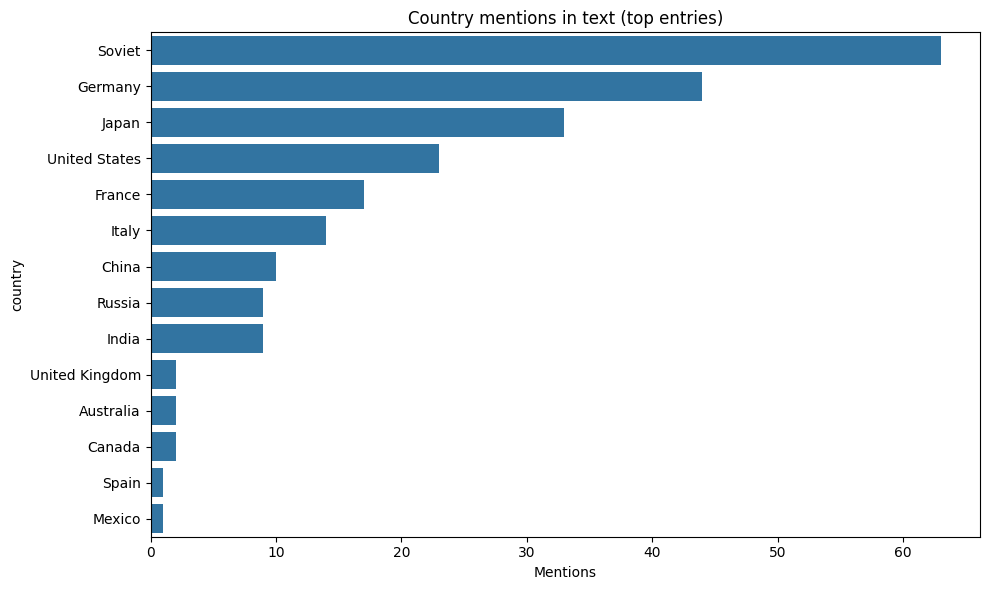

In [23]:
# Cell G: Plot countries with non-zero mentions (top 15)
df_plot = df_countries[df_countries['mentions']>0].head(15)

if df_plot.empty:
    print("No countries from the lookup list were found in the text. Consider expanding the lookup (aliases, historical names).")
else:
    plt.figure(figsize=(10,6))
    sns.barplot(x='mentions', y='country', data=df_plot)
    plt.title("Country mentions in text (top entries)")
    plt.xlabel("Mentions")
    plt.tight_layout()
    plt.show()